# Assignment 4

Team members:

Manaswini Chilla

Kolhatkar, Vighnesh Vivek

# PART 1

In [1]:
import torchvision.datasets as data_sets
import numpy as np
import torch.nn as nn
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
import random
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import seaborn as SeaBorn
from matplotlib import rcParams
%matplotlib inline
rcParams['figure.figsize'] = [10, 8]
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# loading data sets

train = data_sets.MNIST('./', train=True, download=True)
test = data_sets.MNIST('./', train=False, download=True)

In [3]:
# reshaping mnist data

train_n = train.data.numpy() #numpy-train
test_n = test.data.numpy() #numpy_test
train_y_n = train.targets.numpy() #numpy_targets

train_n = train_n.reshape((train_n.shape[0], train_n.shape[1] * train_n.shape[2]))

#displaying the size of train and test
print("Train set: ",len(train_n))
print("Test set: ",len(test_n))

Train set:  60000
Test set:  10000


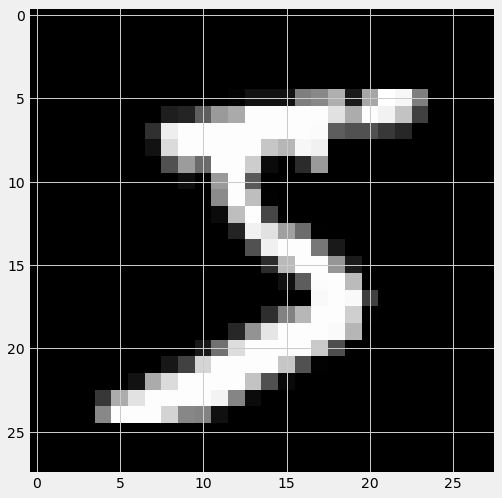

In [4]:
# displaying sample data
iterobj=iter(train)
image, label = next(iterobj)
plt.figure(figsize=(16,8))
plt.imshow(image, cmap = 'gray')

In [5]:
#first setting random data, to perform k clustering 
# taking 20,000 random examples from train_n, (it was observed that clusters form even with data as less as 10,000)

random_indices = random.sample(range(train_n.shape[0]), k=20000)
train_subset_n = train_n[random_indices]
train_subset_y_n = train_y_n[random_indices]

#displaying the shape of our train subsets. (data and labels(y))
print("Train subset: ",train_subset_n.shape)
print("Test subset: ",train_subset_y_n.shape)

Train subset:  (20000, 784)
Test subset:  (20000,)


In [6]:
#performing PCA, Principle component analysis, in order to reduce dimensions of the train subset from 784 to 2

#using inbuilt library
pca = PCA(n_components = 2)
train_subset_n = pca.fit_transform(X=train_subset_n)

#displaying the new dimension of the train subset
print("shape of pca_reduced sample data: ",train_subset_n.shape)

shape of pca_reduced sample data:  (20000, 2)


In [7]:
# function to find optimal k, called for k means, this returns the average ditances of clusters

def return_optimal_k():
    # range of clusters running from 1 to 20
    range_of_clusters = [x for x in range(1,21)]
    avg_distance=[]
    for n_clusters in range_of_clusters:
        kmeans = KMeans(n_clusters=n_clusters).fit(train_subset_n)
        avg_distance.append(kmeans.inertia_)  
        
    return avg_distance

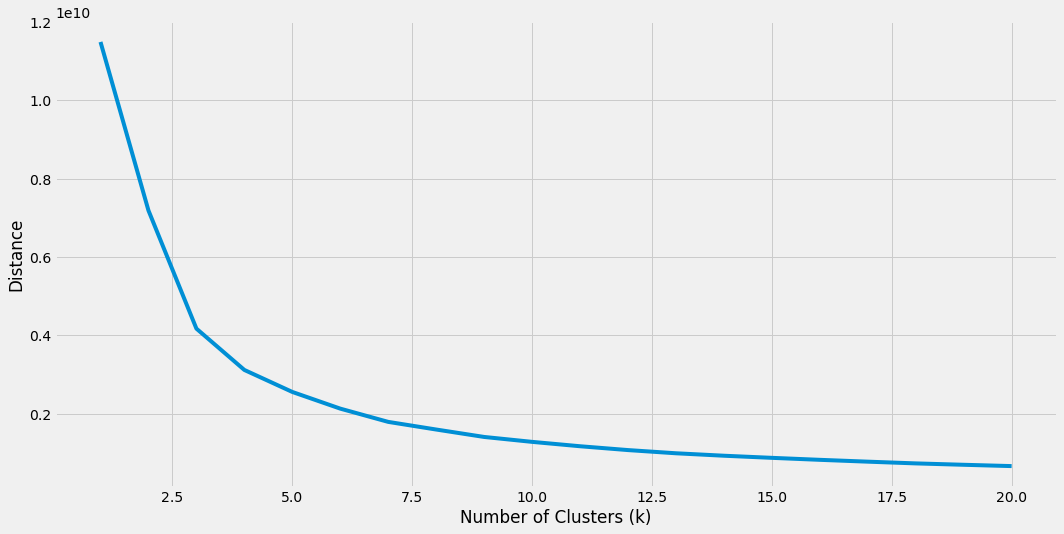

In [8]:
#calling return_optimalk function to return the avg distances, plotting graph to find k by elbow method
avg_distance=return_optimal_k()

# plotting the distances in a graph below
range_of_clusters = [x for x in range(1,21)]
plt.figure(figsize=(16,8))
plt.plot(range_of_clusters, avg_distance)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distance")
plt.show()  

in the above graph, the elbow bend starts at around a number a little less than 5, and the curve seems to stabilize at 
around 10, since there are 10 labels, 0,1,2,3,4,5,6,7,8,9 repectively, choosing k as 10 for this problem statement.

In [9]:
# Tranining with kmeans clustering

kmeans = KMeans(n_clusters=10, init='random', n_init=10, max_iter=300, random_state=0)
label = kmeans.fit_predict(train_subset_n)
centroids = kmeans.cluster_centers_

print("shape of centroids : ", centroids.shape)
print("Train target labels : ")
print(train_subset_y_n)
print("predictions of kmeans: ")
print(label)
print("Kmeans labels: ")
print(kmeans.labels_)

shape of centroids :  (10, 2)
Train target labels : 
[4 9 2 ... 6 9 7]
predictions of kmeans: 
[7 3 0 ... 5 3 7]
Kmeans labels: 
[7 3 0 ... 5 3 7]


Now that a model has been trained with k means, we plot the clusters and the centroids in a scatterplot as shown below

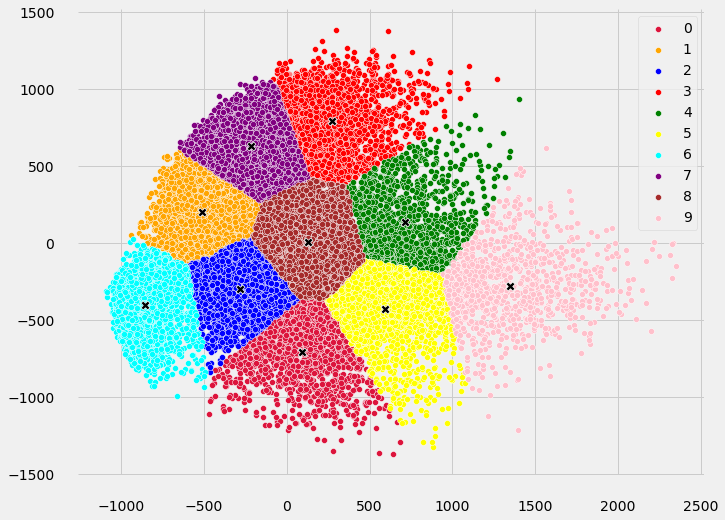

In [11]:
unique_labels = np.unique(label)
color = ['crimson', 'orange', 'blue', 'red', 'green', 'yellow', 'cyan', 'purple', 'brown', 'pink'] 
#plotting the results:
 
for i in unique_labels:
    SeaBorn.scatterplot(train_subset_n[label == i , 0] , train_subset_n[label == i , 1] , label = i, color=color[i])
SeaBorn.scatterplot(centroids[:,0] , centroids[:,1] , s = 80, marker='X', color = 'k')
SeaBorn.despine(offset=20, trim=True)

One key observation to make here is the fact that, with dimensions reduces to 2, and clusters taken as 10, 
the model seems to converge well, we are clearly able to see 10 clusters with their centroids mapped appropriately. 

So what essentially is happenning here is all the 0's 1's 2's etc that are being classified and grouped together by the model,
are being plotted in the scatterplot. but majority of them are not being classified correctly, when checked for accuracy between 
label and train_subset_y_n, we see that the accuracy is very very low

While we have the label, below cell is to calculate the variance, which is sum of variance between each data point and 
its centroid

In [12]:
variance_kmeans = 0
for i, label in enumerate(label):
    variance_kmeans += np.linalg.norm(x=(train_subset_n[i] - centroids[label]))

In the above plot, the clusters key with colors are speicified at the right bottom of the plot. the crosses are the centroids of the clusters.

with the dimentionality reduced to 2 by performing PCA, and training a random sample of the data, keeping the clusters as 10, the above plot is produced and the clusters seem to be formed almost accurately. 

K means has been performed, below we are implementing Kmeans +

In [13]:
# function to find optimal k, called for k means, this returns the average ditances of clusters

def return_optimal_kplus():
    # range of clusters running from 1 to 20
    range_of_clusters = [x for x in range(1,21)]
    avg_distance=[]
    for n_clusters in range_of_clusters:
        kmeans_plus = KMeans(n_clusters=n_clusters, init='k-means++').fit(train_subset_n)
        avg_distance.append(kmeans_plus.inertia_)  
        
    return avg_distance

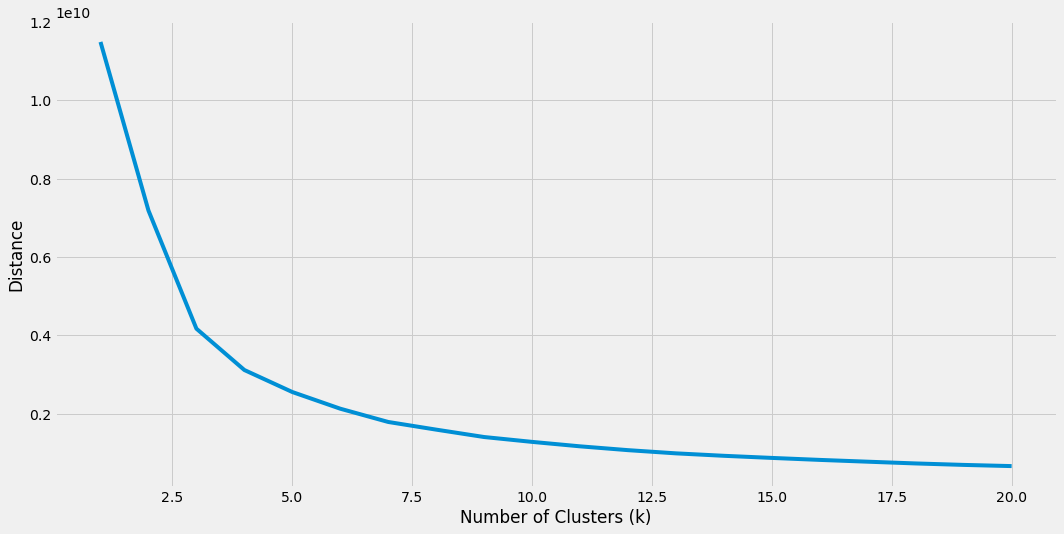

In [14]:
#calling return_optimalk function to return the avg distances, plotting graph to find k by elbow method
avg_distance=return_optimal_kplus()

# plotting the distances in a graph below
range_of_clusters = [x for x in range(1,21)]
plt.figure(figsize=(16,8))
plt.plot(range_of_clusters, avg_distance)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distance")
plt.show()  

In [15]:
# traning kmeans++

kmeans_plus = KMeans(n_clusters=10, init='k-means++', n_init=10, max_iter=300, random_state=0)
label = kmeans_plus.fit_predict(train_subset_n)
centroids_plus = kmeans_plus.cluster_centers_

print("shape of centroids : ", centroids_plus.shape)
print("Train target labels : ")
print(train_subset_y_n)
print("predictions of kmeans: ")
print(label)
print("Kmeans labels: ")
print(kmeans_plus.labels_)

shape of centroids :  (10, 2)
Train target labels : 
[4 9 2 ... 6 9 7]
predictions of kmeans: 
[4 1 0 ... 9 1 4]
Kmeans labels: 
[4 1 0 ... 9 1 4]


the label in the above cell, now contains the predictions of kmeans++, using the same and centroids_plus we plot the results 
in a scatter plot as shown below

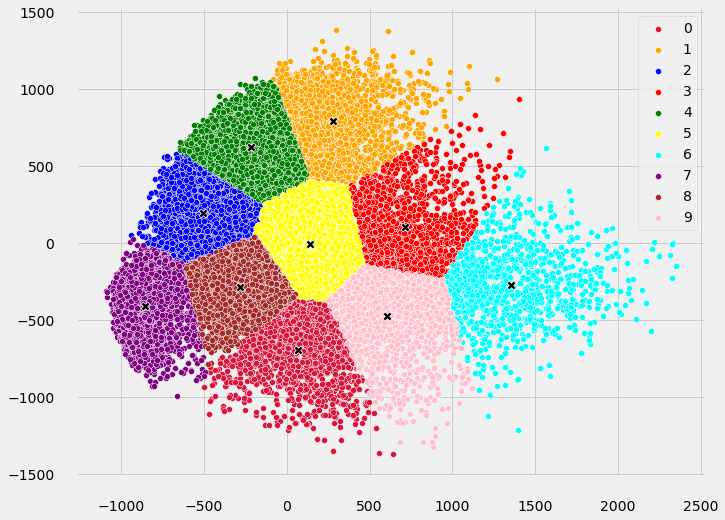

In [16]:
#plotting the results:
 
for i in unique_labels:
    SeaBorn.scatterplot(train_subset_n[label == i , 0] , train_subset_n[label == i , 1] , label = i, color=color[i])
SeaBorn.scatterplot(centroids_plus[:,0] , centroids_plus[:,1] , s = 80, marker='X', color = 'k')
SeaBorn.despine(offset=20, trim=True)

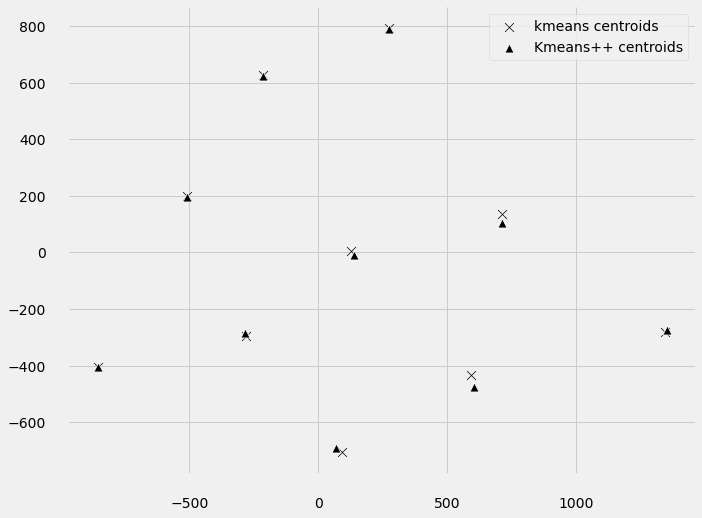

In [17]:
SeaBorn.scatterplot(centroids[:,0] , centroids[:,1] , s = 80, marker='x', color = 'k', label = "kmeans centroids")
SeaBorn.scatterplot(centroids_plus[:,0] , centroids_plus[:,1] , s = 80, marker='^', color = 'k', label = "Kmeans++ centroids")
SeaBorn.despine(offset=20, trim=True)

Kmeans and Kmeans++

kmeans and kmeans++ are both clustering alorithms in unsupervised learning. The only difference is that kmeans starts with 
allocating centers randomly and searches for better solutions whereas kmeans++ allocates the first center randomly, and then
searches for better centers given the first one. 

comparing the scatter plots, the clusters for the classes(thier respective colors) can be seen different from kmeans to that
of kmeans++. This might be because there is a random initialization in the first for both, and as a whole for kmeans,
thus different runs may generate different plots which may be comparable. the scatter plots for both seem representative of all 10 labels.

the centroids of both kmeans and kmeans++ has been plotted above. There seems to little difference between the centroids
of both the approches

calculating the variance for kmeans++

In [18]:
variance_kmeans_plus = 0
for i, label in enumerate(label):
    variance_kmeans_plus += np.linalg.norm(x=(train_subset_n[i] - centroids_plus[label]))

In [19]:
# selecting random sample from each class as initial cluster center for each of the classes

list_data_labels = list(zip(train_subset_n, train_subset_y_n))
list_data_labels[:10]
random.seed(123)
initial_set_of_samples = [random.choice([d_l for d_l in list_data_labels if d_l[1] == l]) for l in range(10)]
print("length of initial set of samples: ",len(initial_set_of_samples))
print("Data point selected from each class : ")
print("\n")
print("datapoint","                      ","class")
for i in range(0,10):
    print(initial_set_of_samples[i][0],"\t",initial_set_of_samples[i][1])

length of initial set of samples:  10
Data point selected from each class : 


datapoint                        class
[1335.22460728 -306.51457446] 	 0
[-976.44338098 -517.5680778 ] 	 1
[-398.89507552 -149.50118035] 	 2
[-388.43597712  -96.37814403] 	 3
[ 23.19824528 618.73227029] 	 4
[341.36497915 533.21313124] 	 5
[852.05920024 -41.25920845] 	 6
[-411.35865388  826.05492089] 	 7
[  72.78981797 -546.48733882] 	 8
[-728.79145876   65.69456412] 	 9


In [20]:
initial_set_of_samples = np.array([d_l[0] for d_l in initial_set_of_samples])

In [21]:
# traning k means
kmeans_random = KMeans(n_clusters=10, init=initial_set_of_samples, n_init=10, max_iter=300, random_state=0)
label = kmeans_random.fit_predict(train_subset_n)
centroids_random = kmeans_random.cluster_centers_ 

print("shape of centroids : ", centroids_random.shape)
print("Train target labels : ")
print(train_subset_y_n)
print("predictions of kmeans: ")
print(label)
print("Kmeans labels: ")
print(kmeans_random.labels_)

shape of centroids :  (10, 2)
Train target labels : 
[4 9 2 ... 6 9 7]
predictions of kmeans: 
[7 4 2 ... 6 4 7]
Kmeans labels: 
[7 4 2 ... 6 4 7]


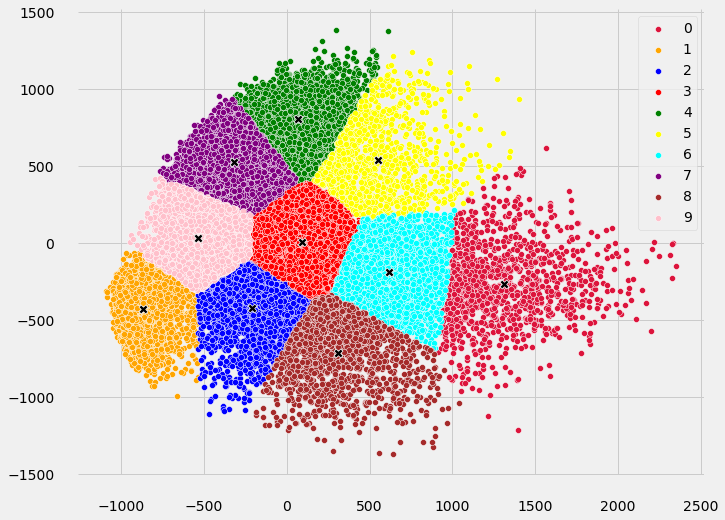

In [22]:
for i in unique_labels:
    SeaBorn.scatterplot(train_subset_n[label == i , 0] , train_subset_n[label == i , 1] , label = i, color=color[i])
SeaBorn.scatterplot(centroids_random[:,0] , centroids_random[:,1] , s = 80, marker='X', color = 'k')
SeaBorn.despine(offset=20, trim=True)

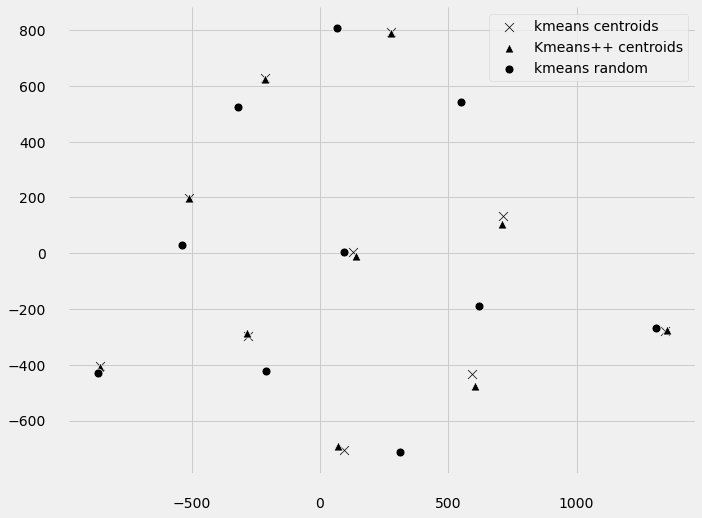

In [23]:
SeaBorn.scatterplot(centroids[:,0] , centroids[:,1] , s = 80, marker='x', color = 'k', label = "kmeans centroids")
SeaBorn.scatterplot(centroids_plus[:,0] , centroids_plus[:,1] , s = 80, marker='^', color = 'k', label = "Kmeans++ centroids")
SeaBorn.scatterplot(centroids_random[:,0] , centroids_random[:,1] , s = 80, marker='o', color = 'k', label = "kmeans random")
SeaBorn.despine(offset=20, trim=True)

as discussed above, the difference in the scatter plot from previous scatter plots can be justified due to random initilisation. they seem representative of the labels

the centroids of all three approaches have been plotted in the above graph, because we have given the initial set of 
centroids randomly, kmeans trained on this, must have attempted to find the best solution based on these initial centroids.
since these centroids have been generated by taking a sample data point from each class, this might explain the the difference
in position of these centroids(circles of kmeans random) from the other centroids(x's and triangles from kmeans and kmeans++). 

variance of kmeans of 3'rd approach calculated below:

In [24]:
variance_kmeans_random = 0
for i, label in enumerate(label):
    variance_kmeans_random+= np.linalg.norm(x=(train_subset_n[i] - centroids_random[label]))

variance of all 3 approaches displayed below:

In [28]:
print("Variance of kmeans: ", variance_kmeans)
print("Variance of k-means++ : ", variance_kmeans_plus)
print("Variance of k means random: ", variance_kmeans_random)

Variance of kmeans: 4543636.355950924
Variance of k-means++ : 4540827.283459287
Variance of k means random: 4572392.710285028


as shown above, the total variance of kmeans++ seems to be lesser than kmeans. whereas, the variance of the last approach seems to be highest, this is probably because kmeans++ after selecting the initial centroid, it might allocate centroid based on the "nearest" approach. and since intial centroids in the 3'rd approach have been initialised first on random basis, the variance seems to have a higher value.

Although, while traning higher and lower subsets of the data, these values change, they may be nearly same or increase from one another, Since each time this algorithm is run, it involves random initilisation, we may be able to draw concerete conclusions.

# PART 2

In [1]:
conda install -c pytorch pytorch

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install pytorch torchvision -c pytorch

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
import time
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd

from sklearn.metrics import *
import warnings
warnings.filterwarnings('ignore')



from sklearn.ensemble import RandomForestClassifier  #Random Forest algorithm
from sklearn.metrics import classification_report, confusion_matrix
#from sklearn.model_selection import RandomizedSearchCV, GridSearchCV 
from sklearn.model_selection import cross_val_score


#PCA
from sklearn.decomposition import PCA


### Splitting MNIST Data with 60000 samples into Train dataset and 10000 into Test Dataset 


In [4]:
mnist = fetch_openml('mnist_784',version=1)
#mnist.keys()


In [5]:
x,y = mnist["data"], mnist["target"]
y=y.astype(int)
x=((x/255.)-.5)*2
print(x.shape,y.shape)
print(min(y),max(y))
print(type(x),type(y))
print(np.min(x), np.max(x))

train_x, test_x, train_y, test_y = x[:60000], x[60000:], y[:60000], y[60000:]
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(70000, 784) (70000,)
0 9
<class 'numpy.ndarray'> <class 'numpy.ndarray'>
-1.0 1.0
(60000, 784) (10000, 784) (60000,) (10000,)


### Training the RandomForestClassifier, testing the Accuracy  and generating the Confusion Matrix

In [6]:
# Training Random Forest Classifier

def RandomForest(train_x, train_y, test_x, test_y):
    start_time = time.time()
    rf = RandomForestClassifier(n_estimators=100)
    rf.fit(train_x, train_y)
    end_time = time.time()
    print("The Random forest took ",(end_time - start_time)," seconds to train \n")

    pred_y = rf.predict(test_x)
    print ("Classification Report : ")
    print(classification_report(test_y, pred_y))
    print ("Confusion Matix : ")
    print(confusion_matrix(test_y, pred_y))

#### For Original Dataset , splitting the data on x and y labels, fit the RandomForestClassifier on that
####    Predicting the results and testing the accuracy using test set
#### Results of Random Forest (Training time, Accuracy, Confusion Matrix) 

In [7]:
#train_x_og, train_y_og, test_x_og, test_y_og = split_data(train_set_og, test_set_og)
print("For the original Data : \n")
RandomForest(train_x, train_y, test_x, test_y)

For the original Data : 

The Random forest took  48.485692739486694  seconds to train 

Classification Report : 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.96      0.97      0.97      1032
           3       0.96      0.97      0.96      1010
           4       0.98      0.97      0.97       982
           5       0.97      0.96      0.97       892
           6       0.97      0.98      0.98       958
           7       0.97      0.96      0.96      1028
           8       0.96      0.95      0.96       974
           9       0.96      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Confusion Matix : 
[[ 970    0    0    0    0    3    2    1    3    1]
 [   0 1123    2    3    0    1    4    1    1    0]
 [

The average accuracy of the Random Forest model on the original dataset is 97%. 

In [8]:
def generate_pca(X_train, X_test, explained_variance):
    
    #PCA is effected by scale so we need to scale the features in the data before applying PCA
    #scaler = StandardScaler()
    # Fit on training set only.
    #scaler.fit(X_train)
    
    # Apply transform to both the training set and the test set.
    #X_train = scaler.transform(X_train)
    #X_test = scaler.transform(X_test)
    
    # for the number of components parameter, such that variance is retained accordingly
    pca = PCA(explained_variance)
    
    #Fit PCA on training dataset
    #Apply the transform to both the training dataset and the test dataset.
    X_train = pca.fit_transform(X_train)
    X_test = pca.transform(X_test)
    
    print(pca.explained_variance_ratio_)
    #X_train = pd.DataFrame(X_train)
    #X_test = pd.DataFrame(X_test)
    
    return X_train, X_test
    

### Dimensionality reduction using Principle Component Analysis (PCA) for explained variance ratio = 0.95

In [9]:
train_x_pca_95, test_x_pca_95 = generate_pca(train_x, test_x, 0.95)

[0.09704664 0.07095924 0.06169089 0.05389419 0.04868797 0.04312231
 0.0327193  0.02883895 0.02762029 0.02357001 0.0210919  0.02022991
 0.01715818 0.01692111 0.01578641 0.01482953 0.01324561 0.01276897
 0.01187263 0.01152684 0.01066166 0.01006713 0.00953573 0.00912544
 0.00883405 0.00839319 0.00812579 0.00786366 0.00744733 0.00690859
 0.00658094 0.00648148 0.00602615 0.00586582 0.00570021 0.00543628
 0.00505786 0.00487859 0.00481429 0.00472266 0.00456747 0.00444836
 0.00418501 0.00398215 0.00384975 0.00375103 0.00362009 0.00351591
 0.00340058 0.00321874 0.00319017 0.00312805 0.00295983 0.00288955
 0.0028413  0.00271436 0.00269521 0.00258473 0.00253771 0.00244781
 0.00240506 0.00239263 0.00230408 0.00221532 0.00213721 0.00207225
 0.00203043 0.00196783 0.00192853 0.00188632 0.00186977 0.00181083
 0.00177562 0.00174898 0.00165758 0.00163894 0.00161462 0.00155116
 0.00147613 0.00143176 0.00142094 0.00141153 0.00140174 0.00135736
 0.00133847 0.00132396 0.00130157 0.00125873 0.00122828 0.0012

vector of the variance explained by each dimension. 

#### For Dataset with explained variance ratio = 0.95, splitting the data on x and y labels, fit the RandomForestClassifier on that
####    Predicting the results and testing the accuracy using test set
#### Results of Random Forest (Training time, Accuracy, Confusion Matrix) 

In [10]:
print("After implementing PCA on Original Data with explained variance ratio : 0.95 \n")
print("The features reduced to : ", train_x_pca_95.shape, "\n")
RandomForest(train_x_pca_95, train_y, test_x_pca_95, test_y)

After implementing PCA on Original Data with explained variance ratio : 0.95 

The features reduced to :  (60000, 154) 

The Random forest took  123.3115828037262  seconds to train 

Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.94      0.93      0.94      1032
           3       0.92      0.95      0.93      1010
           4       0.94      0.95      0.94       982
           5       0.94      0.94      0.94       892
           6       0.97      0.98      0.97       958
           7       0.96      0.94      0.95      1028
           8       0.93      0.90      0.92       974
           9       0.94      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

Confusion Matix : 
[[ 963    0   

The average accuracy of the Random Forest model after applying PCA (explained variance = 0.95) on the original dataset is 95%. 

### Dimensionality reduction using Principle Component Analysis (PCA) for explained variance ratio = 0.90

In [11]:
train_x_pca_90, test_x_pca_90 = generate_pca(train_x, test_x, 0.90)

[0.09704664 0.07095924 0.06169089 0.05389419 0.04868797 0.04312231
 0.0327193  0.02883895 0.02762029 0.02357001 0.0210919  0.02022991
 0.01715818 0.01692111 0.01578641 0.01482953 0.01324561 0.01276897
 0.01187263 0.01152684 0.01066166 0.01006713 0.00953573 0.00912544
 0.00883405 0.00839319 0.00812579 0.00786366 0.00744733 0.00690859
 0.00658094 0.00648148 0.00602615 0.00586582 0.00570021 0.00543628
 0.00505786 0.00487859 0.00481429 0.00472266 0.00456747 0.00444836
 0.00418501 0.00398215 0.00384975 0.00375103 0.00362009 0.00351591
 0.00340058 0.00321874 0.00319017 0.00312805 0.00295983 0.00288955
 0.0028413  0.00271436 0.00269521 0.00258473 0.00253771 0.00244781
 0.00240506 0.00239263 0.00230408 0.00221532 0.00213721 0.00207225
 0.00203043 0.00196783 0.00192853 0.00188632 0.00186977 0.00181083
 0.00177562 0.00174898 0.00165758 0.00163894 0.00161462 0.00155116
 0.00147613 0.00143176 0.00142094 0.00141153 0.00140174 0.00135736
 0.00133847 0.00132396 0.00130157]


#### For Dataset with explained variance ratio = 0.90, splitting the data on x and y labels, fit the RandomForestClassifier on that
####    Predicting the results and testing the accuracy using test set
#### Results of Random Forest (Training time, Accuracy, Confusion Matrix) 

In [12]:
print("After implementing PCA on Original Data with explained variance ratio : 0.90 \n")
print("The features reduced to : ", train_x_pca_95.shape, "\n")
RandomForest(train_x_pca_90, train_y, test_x_pca_90, test_y)

After implementing PCA on Original Data with explained variance ratio : 0.90 

The features reduced to :  (60000, 154) 

The Random forest took  104.68511486053467  seconds to train 

Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.94      0.94      1032
           3       0.93      0.95      0.94      1010
           4       0.94      0.95      0.95       982
           5       0.94      0.94      0.94       892
           6       0.96      0.98      0.97       958
           7       0.96      0.94      0.95      1028
           8       0.94      0.91      0.92       974
           9       0.94      0.92      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

Confusion Matix : 
[[ 962    0  

The average accuracy of the Random Forest model after applying PCA (explained variance = 0.90) on the original dataset is 95%. 

### Dimensionality reduction using Principle Component Analysis (PCA) for explained variance ratio = 0.85

In [13]:
train_x_pca_85, test_x_pca_85 = generate_pca(train_x, test_x, 0.85)

[0.09704664 0.07095924 0.06169089 0.05389419 0.04868797 0.04312231
 0.0327193  0.02883895 0.02762029 0.02357001 0.0210919  0.02022991
 0.01715818 0.01692111 0.01578641 0.01482953 0.01324561 0.01276897
 0.01187263 0.01152684 0.01066166 0.01006713 0.00953573 0.00912544
 0.00883405 0.00839319 0.00812579 0.00786366 0.00744733 0.00690859
 0.00658094 0.00648148 0.00602615 0.00586582 0.00570021 0.00543628
 0.00505786 0.00487859 0.00481429 0.00472266 0.00456747 0.00444836
 0.00418501 0.00398215 0.00384975 0.00375103 0.00362009 0.00351591
 0.00340058 0.00321874 0.00319017 0.00312805 0.00295983 0.00288955
 0.0028413  0.00271436 0.00269521 0.00258473 0.00253771]


#### For Dataset with explained variance ratio = 0.85, splitting the data on x and y labels, fit the RandomForestClassifier on that
####    Predicting the results and testing the accuracy using test set
#### Results of Random Forest (Training time, Accuracy, Confusion Matrix) 

In [14]:
print("After implementing PCA on Original Data with explained variance ratio : 0.85 \n")
print("The features reduced to : ", train_x_pca_95.shape, "\n")
RandomForest(train_x_pca_85, train_y, test_x_pca_85, test_y)

After implementing PCA on Original Data with explained variance ratio : 0.85 

The features reduced to :  (60000, 154) 

The Random forest took  76.10201978683472  seconds to train 

Classification Report : 
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.99      0.99      0.99      1135
           2       0.95      0.95      0.95      1032
           3       0.94      0.95      0.95      1010
           4       0.94      0.95      0.95       982
           5       0.94      0.95      0.94       892
           6       0.96      0.98      0.97       958
           7       0.96      0.94      0.95      1028
           8       0.94      0.92      0.93       974
           9       0.94      0.93      0.93      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

Confusion Matix : 
[[ 963    0   

The average accuracy of the Random Forest model after applying PCA (explained variance = 0.85) on the original dataset is 95%. 

##### Originally the data had 784 features, Random Forest Classifier was trained on it. The average accuracy of that model was 97%

##### Then, the features were reduced to 154 after implementing PCA. 

##### The Random Forest Classifier was again trained, for Explained variance ratio 0.95, 0.90, 0.85.

##### The average accuracy of the model after applying PCA (explained variance = 0.95, 0.90, 0.85) on the original dataset was 95%. 


##### If we look at the documentation:

##### max_features : int, float, string or None, optional (default=”auto”)

##### The number of features to consider when looking for the best split:

##### If “auto”, then max_features=sqrt(n_features).
##### That means that wer original problem was sqrt(784) = 28 and we reduced it to sqrt(154) = 12.

##### It's smaller than before but not as much as expected.

##### Optimization:
##### The way that Random forest is built, is by looking at possible splits and picking the best ones according to a certain criteria. 

##### The function to measure the quality of a split. 
##### The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than max_features features.

##### So, while fitting, the algorithm is iterating over possible splits that optimize the criterion. However, by reducing the number of features we might have made the problem to find this splits more difficult (by having less good splits to find), which makes the algorithm need more iterations to find a good split.

##### Thus, the Random Forest training time increases from 43 seconds(original data) to 97 seconds(PCA: 0.95) then it decreases gradually 73 seconds(PCA: 0.90) and 54 seconds(PCA: 0.85).



##### Since, PCA treats the feature which has large variance as important feature, but the feature which has large variance can have noting to do with the prediction target. This means, a lot of useless features are produced and useful features are eliminated after PCA.

##### Thus, the accuracy of the Random Forest model decreased from 97% to 95% after applying PCA.



Citations:

https://towardsdatascience.com/kmeans-clustering-for-classification-74b992405d0a https://towardsdatascience.com/classifying-mnist-digits-using-pca-deep-learning-852aeaff48a5
https://github.com/akhilgadi/Dimension-Reduction-on-MNIST/blob/master/MNIST.ipynb https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891 https://www.askpython.com/python/examples/plot-k-means-clusters-python https://stats.stackexchange.com/questions/130888/k-means-vs-k-means